In [1]:
import glob
from collections import Counter
import calendar

import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import independence
from unseen import bias_correction
from unseen import similarity
from unseen import eva
from unseen import stability
from unseen import moments
from unseen import process_utils

Matplotlib is building the font cache; this may take a moment.


In [7]:
from importlib import reload

## Obs

In [17]:
agcd_files = glob.glob('/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_*.nc')
agcd_files.sort()
agcd_files

['/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1900.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1901.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1902.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1903.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1904.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1905.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1906.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1907.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1908.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r005/01day/agcd_v1-0-1_precip_total_r005_daily_1909.nc',
 '/g/data/zv2/agcd/v1-0-1/precip/total/r

In [18]:
agcd_ds = fileio.open_dataset(
    agcd_files,
    variables=['pr'],
    point_selection=[-42.9, 147.3],
    rolling_sum_window=5,
    time_freq='A-DEC',
    time_agg='max',
    time_agg_dates=True,
    input_freq='D',
    metadata_file='../../config/dataset_agcd_daily.yml',
    units={'pr': 'mm day-1'},
)

/home/599/dbi599/unseen/unseen/time_utils.py:37: FutureWarning: Following pandas, the `loffset` parameter to resample will be deprecated in a future version of xarray.  Switch to using time offset arithmetic.
  ds_arg = ds.resample(


In [19]:
print(agcd_ds)

<xarray.Dataset>
Dimensions:     (time: 123)
Coordinates:
  * time        (time) object 1900-12-31 00:00:00 ... 2022-12-31 00:00:00
Data variables:
    pr          (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    event_time  (time) <U28 '1900-04-17' '1901-04-25' ... '2022-05-08'
Attributes: (12/33)
    geospatial_lat_min:        -44.525
    geospatial_lat_max:        -9.975
    geospatial_lon_min:        111.975
    geospatial_lon_max:        156.275
    time_coverage_start:       1899-12-31T09:00:00
    date_created:              2017-01-17T22:13:51.976225
    ...                        ...
    licence:                   Data Licence: The grid data files in this AGCD...
    description:               This AGCD data is a snapshot of the operationa...
    date_issued:               2023-05-19 06:19:17
    attribution:               Data should be cited as : Australian Bureau of...
    copyright:                 (C) Copyright Commonwealth of Australia 2023, ...
    history:

In [20]:
agcd_ds = agcd_ds.compute()

In [21]:
agcd_ds['event_time']

<xarray.DataArray 'event_time' (time: 123)>
array(['1900-04-17', '1901-04-25', '1902-02-28', '1903-06-10',
       '1904-02-29', '1905-05-31', '1906-10-05', '1907-12-30',
       '1908-10-10', '1909-04-23', '1910-09-30', '1911-03-14',
       '1912-09-19', '1913-04-27', '1914-12-30', '1915-04-14',
       '1916-12-15', '1917-04-08', '1918-08-26', '1919-03-09',
       '1920-12-18', '1921-07-19', '1922-07-19', '1923-11-09',
       '1924-02-20', '1925-05-15', '1926-06-29', '1927-02-23',
       '1928-04-29', '1929-04-06', '1930-11-29', '1931-10-05',
       '1932-03-14', '1933-10-06', '1934-12-31', '1935-04-19',
       '1936-12-23', '1937-10-19', '1938-03-18', '1939-06-05',
       '1940-10-28', '1941-12-08', '1942-05-31', '1943-11-07',
       '1944-01-07', '1945-02-03', '1946-03-29', '1947-12-23',
       '1948-05-31', '1949-01-18', '1950-06-02', '1951-04-15',
       '1952-10-13', '1953-09-24', '1954-06-08', '1955-06-27',
       '1956-05-07', '1957-09-19', '1958-08-20', '1959-09-22',
       '1960-04-24', '1961-04-27', '1962-09-29', '1963-07-13',
       '1964-02-13', '1965-04-23', '1966-09-08', '1967-07-12',
       '1968-08-06', '1969-12-15', '1970-01-06', '1971-01-01',
       '1972-12-26', '1973-05-05', '1974-07-11', '1975-08-30',
       '1976-08-06', '1977-03-29', '1978-08-11', '1979-09-16',
       '1980-07-01', '1981-06-05', '1982-03-30', '1983-09-10',
       '1984-08-14', '1985-12-20', '1986-01-13', '1987-05-28',
       '1988-05-19', '1989-10-31', '1990-07-06', '1991-12-19',
       '1992-07-06', '1993-12-30', '1994-01-01', '1995-12-22',
       '1996-04-21', '1997-01-25', '1998-12-29', '1999-02-09',
       '2000-08-25', '2001-08-21', '2002-01-12', '2003-03-24',
       '2004-02-01', '2005-02-06', '2006-05-04', '2007-01-22',
       '2008-11-24', '2009-06-07', '2010-08-15', '2011-04-15',
       '2012-05-28', '2013-07-24', '2014-08-02', '2015-01-18',
       '2016-06-09', '2017-12-05', '2018-05-14', '2019-08-25',
       '2020-06-25', '2021-03-28', '2022-05-08'], dtype='<U28')
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 2022-12-31 00:00:00

In [113]:
agcd_df = agcd_ds.to_dataframe()

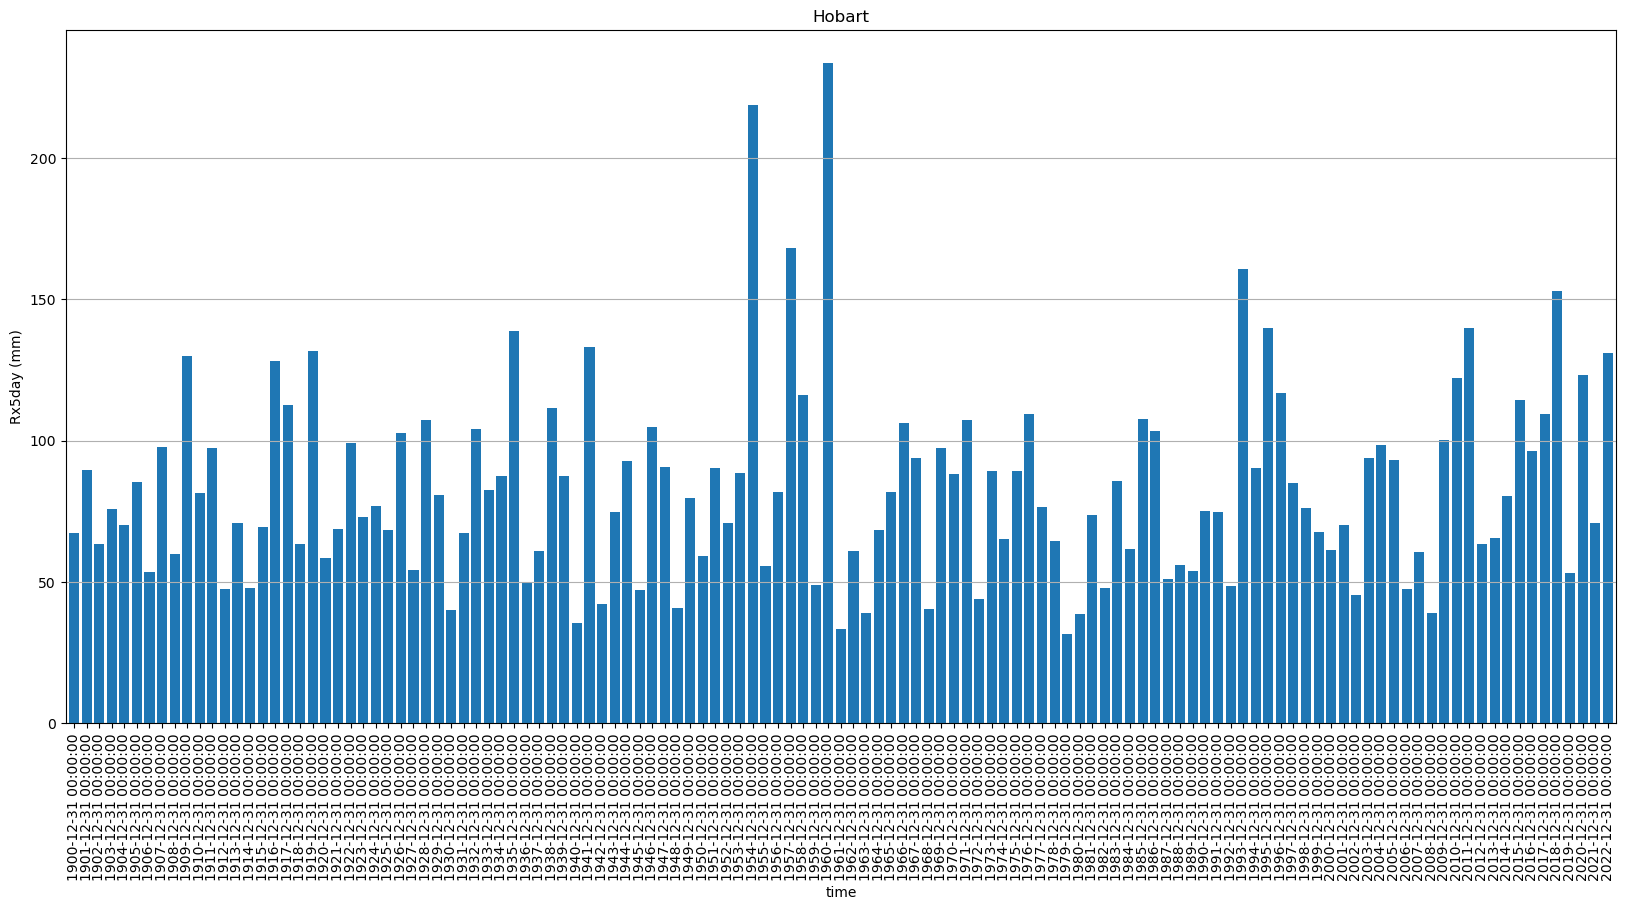

In [114]:
agcd_df['pr'].plot.bar(figsize=[20, 9], width=0.8)
plt.ylabel('Rx5day (mm)')
plt.title('Hobart')
plt.grid(axis='y')

plt.savefig(
    'observational_record.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)

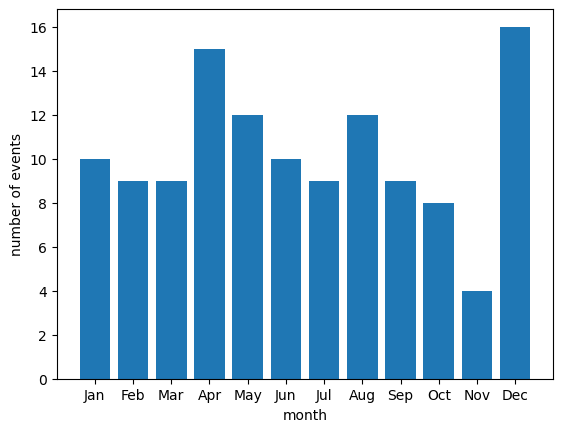

In [116]:
process_utils.plot_event_seasonality(agcd_df, outfile='observational_seasonality.png')

In [25]:
ranked_years = agcd_df.sort_values(by='pr', ascending=False)
print(ranked_years.head(n=10))

              pr  event_time
1960  233.678711  1960-04-24
1954  218.961914  1954-06-08
1957  168.168945  1957-09-19
1993  160.882812  1993-12-30
2018  153.111328  2018-05-14
2011  139.841797  2011-04-15
1995  139.805664  1995-12-22
1935  138.672852  1935-04-19
1941  133.274414  1941-12-08
1919  131.631836  1919-03-09


In [26]:
rx5day_max = ranked_years.iloc[0]['pr']
print(rx5day_max)

233.67871


The event 20-24 April 1960: http://www.bom.gov.au/tas/flood/flood_history/flood_history.shtml#yr1960_1969

In [27]:
agcd_shape, agcd_loc, agcd_scale = eva.fit_gev(agcd_ds['pr'].values)

In [28]:
event_probability = gev.sf(rx5day_max, agcd_shape, loc=agcd_loc, scale=agcd_scale)
event_return_period = 1. / event_probability
event_percentile = (1 - event_probability) * 100

print(f'{event_return_period:.0f} year return period')
print(f'{event_percentile:.2f}% percentile\n')

297 year return period
99.66% percentile



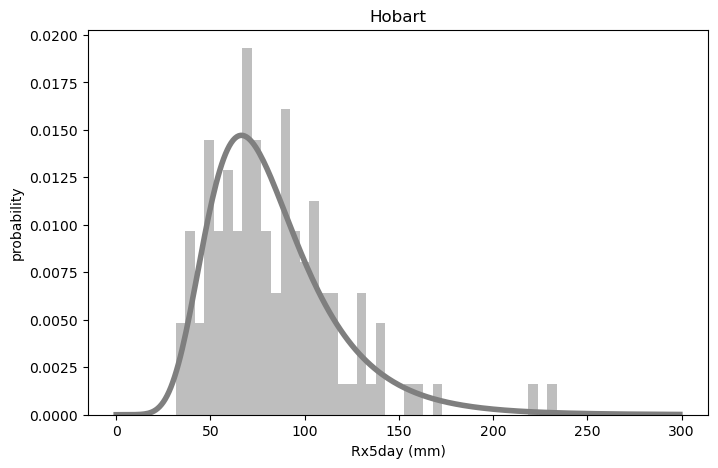

In [29]:
fig, ax = plt.subplots(figsize=[8, 5])
xvals = np.arange(0, 300)
agcd_ds['pr'].plot.hist(bins=40, density=True, color='tab:gray', alpha=0.5)
agcd_pdf = gev.pdf(xvals, agcd_shape, agcd_loc, agcd_scale)
plt.plot(xvals, agcd_pdf, color='tab:gray', linewidth=4.0)
plt.xlabel('Rx5day (mm)')
plt.ylabel('probability')
plt.title('Hobart')
plt.show()

## Model

In [23]:
#model_ds = fileio.open_mfforecast(
#    '/home/599/dbi599/east-coast-rain/file_lists/CanESM5_dcppA-hindcast_pr_files.txt',
#    n_ensemble_files=20,
#    variables=['pr'],
#    point_selection=[-42.9, 147.3],
#    rolling_sum_window=5,
#    time_freq='A-DEC',
#    time_agg='max',
#    time_agg_dates=True,
#    input_freq='D',
#    units={'pr': 'mm day-1'},
#    reset_times=True,
#    complete_time_agg_periods=True,
#)

In [ ]:
#print(model_ds)

In [ ]:
# /g/data/xv83/dbi599/miniconda3/envs/unseen2/bin/fileio
# /home/599/dbi599/east-coast-rain/file_lists/HadGEM3-GC31-MM_dcppA-hindcast_pr_files.txt
# /g/data/xv83/dbi599/unseen/Rx5day_HadGEM3-GC31-MM_dcppA-hindcast_s1960-2018_gn_hobart.zarr.zip
# --n_ensemble_files 10
# --n_time_files 12
# --variables pr
# --rolling_sum_window 5
# --time_freq A-DEC 
# --time_agg max
# --input_freq D
# --point_selection -42.9 147.3
# --reset_times
# --complete_time_agg_periods
# --time_agg_dates
# --units pr='mm day-1'
# --forecast -v 

In [2]:
model_ds = xr.open_dataset('/g/data/xv83/dbi599/unseen/Rx5day_HadGEM3-GC31-MM_dcppA-hindcast_s1960-2018_gn_hobart.zarr.zip', engine='zarr')

In [3]:
model_ds = model_ds.compute()

In [5]:
print(model_ds)

<xarray.Dataset>
Dimensions:     (ensemble: 10, init_date: 59, lead_time: 12)
Coordinates:
  * ensemble    (ensemble) int64 0 1 2 3 4 5 6 7 8 9
    event_time  (init_date, ensemble, lead_time) <U28 '1960-02-14' ... '2029-...
  * init_date   (init_date) object 1960-11-01 00:00:00 ... 2018-11-01 00:00:00
  * lead_time   (lead_time) int64 0 1 2 3 4 5 6 7 8 9 10 11
    time        (lead_time, init_date) object 1960-11-01 12:00:00 ... 2029-11...
Data variables:
    pr          (init_date, ensemble, lead_time) float32 nan 100.9 ... 28.0 nan
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.4.0
    ...                     ...
    table_info:             Creation Date:(13 December 2018) MD5:f0588f7f55b5...
    title:                  HadGEM3-GC31-MM output prepared for CMIP6
    tracking_id:            hdl:21.14100/31

## Stability and stationarity

/home/599/dbi599/unseen/unseen/eva.py:253: UserWarning: Data fit failed. Retrying with 'generate_estimates=True'.
  warnings.warn(
/home/599/dbi599/unseen/unseen/eva.py:253: UserWarning: Data fit failed. Retrying with 'generate_estimates=True'.
  warnings.warn(


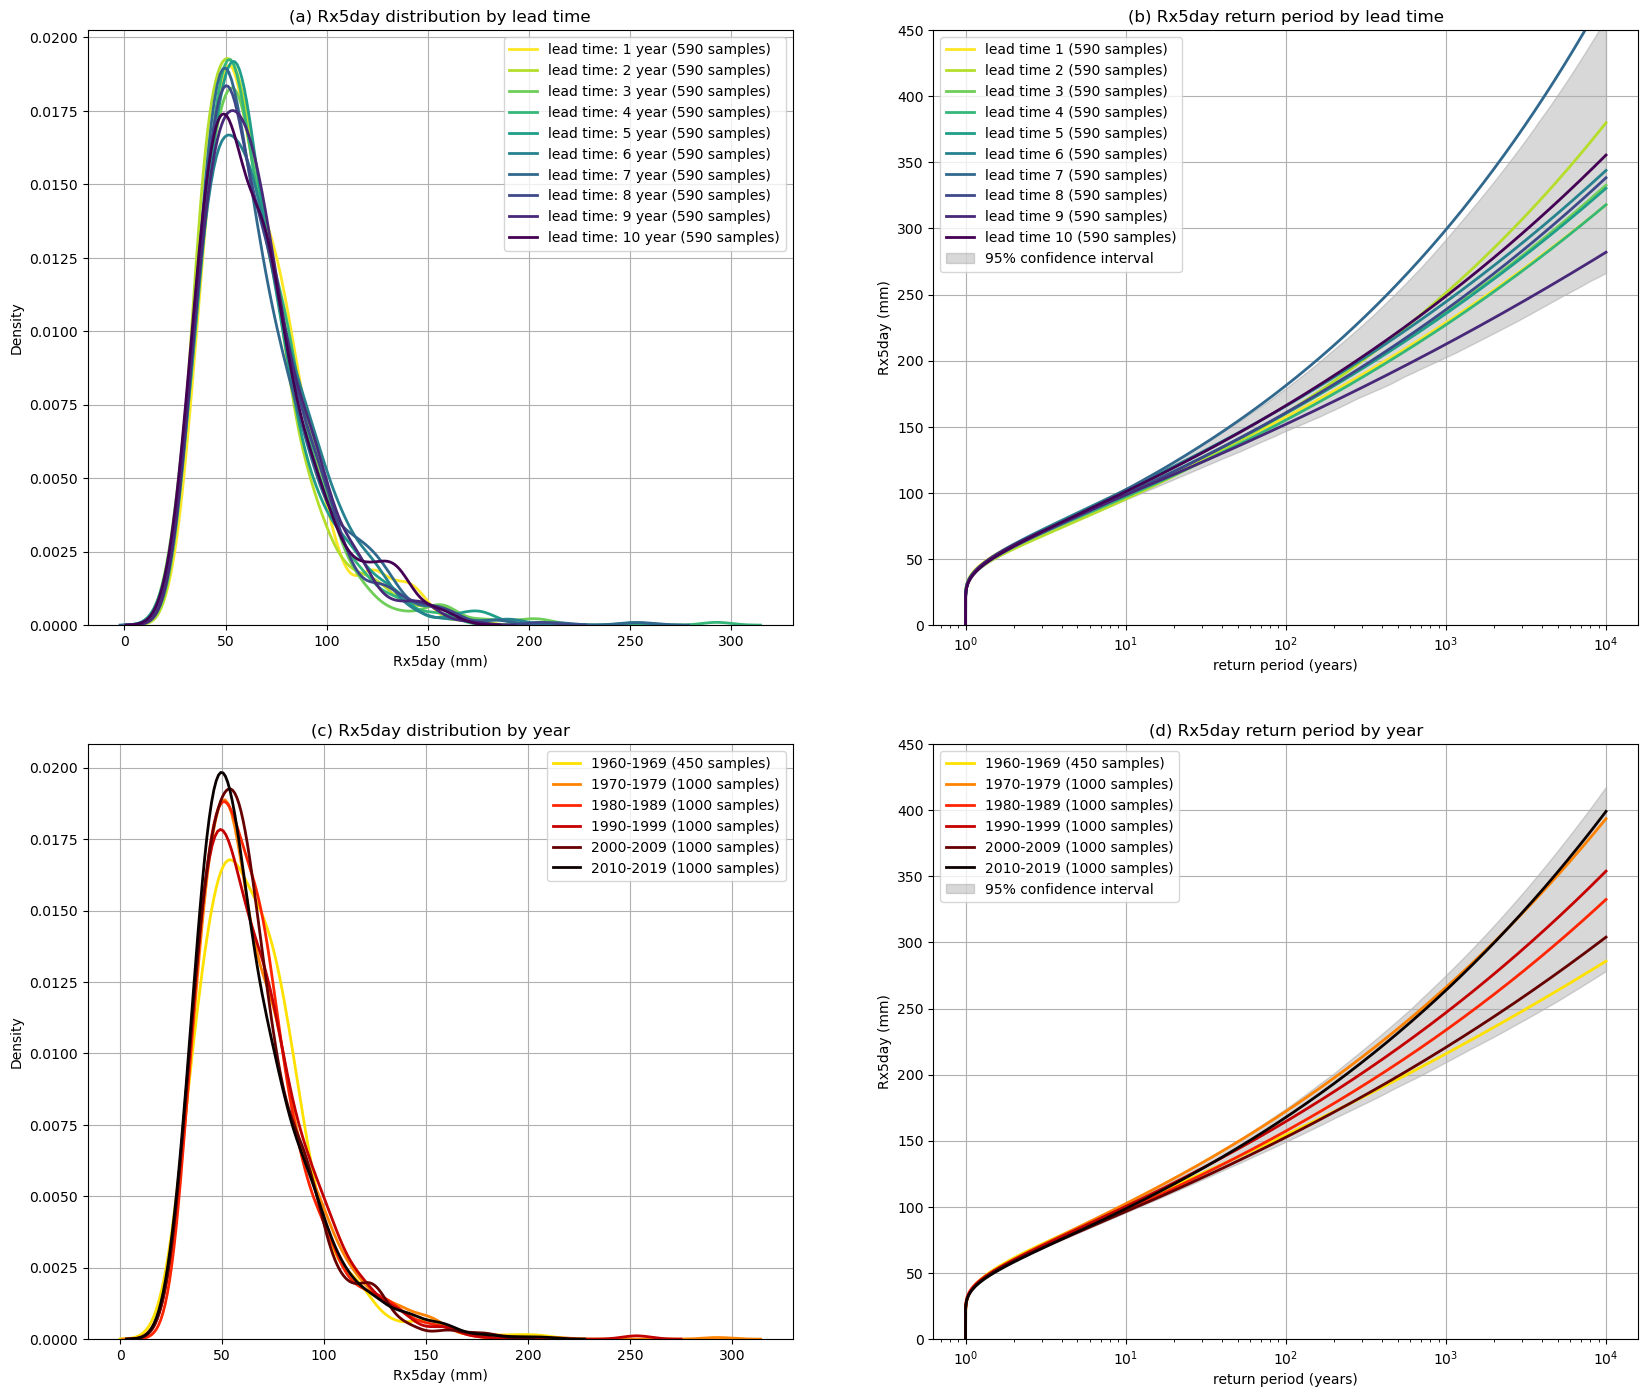

In [9]:
stability.create_plot(
    model_ds['pr'],
    'Rx5day',
    [1960, 1970, 1980, 1990, 2000, 2010],
    outfile='stability.png',
    uncertainty=True,
    return_method='gev',
    units='Rx5day (mm)',
    ylim=(0, 450),
)

## Independence testing

In [10]:
mean_correlations, null_correlation_bounds = independence.run_tests(model_ds['pr'])

In [11]:
print(mean_correlations)

{11: <xarray.DataArray (lead_time: 12)>
dask.array<mean_agg-aggregate, shape=(12,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9 10 11}


/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xskillscore/core/np_deterministic.py:309: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xskillscore/core/np_deterministic.py:309: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den


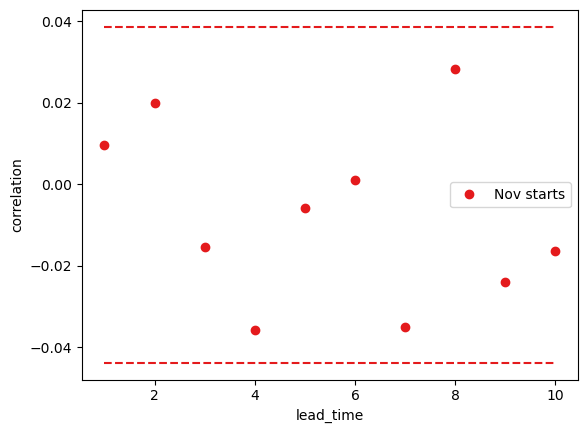

In [12]:
independence.create_plot(
    mean_correlations,
    null_correlation_bounds,
    'independence.png'
)

So we should drop the first two lead times (TODO: We need a function where we can drop a different number of lead times for each init date).

In [13]:
#cafe_da_indep = cafe_ds['pr'].dropna('lead_time').sel({'lead_time': slice(3, None)})
model_da_indep = model_ds['pr'].where(model_ds['lead_time'] > 0)
model_da_indep = model_da_indep.dropna('lead_time')

In [14]:
model_da_indep

<xarray.DataArray 'pr' (init_date: 59, ensemble: 10, lead_time: 10)>
array([[[100.882416,  59.101746,  50.513184, ...,  72.814026,
          47.615986,  60.41703 ],
        [ 59.334   ,  33.80462 ,  75.82639 , ...,  44.605373,
          34.917683,  59.61616 ],
        [ 31.110619, 127.5415  ,  76.78214 , ...,  62.714207,
          81.598175,  61.392296],
        ...,
        [ 54.87059 ,  92.36635 ,  66.44363 , ...,  95.78178 ,
          46.16651 ,  83.41238 ],
        [ 58.627533,  66.82831 ,  32.41794 , ...,  67.723145,
          77.81938 ,  49.485268],
        [ 54.334064,  45.583908,  67.08059 , ...,  88.85287 ,
         115.39417 ,  52.16396 ]],

       [[ 53.48728 ,  56.95953 ,  63.92677 , ...,  44.904198,
          79.179245, 102.832115],
        [133.40063 ,  34.3559  ,  63.584846, ...,  71.573845,
          51.077995,  75.63232 ],
        [104.252754,  65.710106,  55.676964, ...,  46.016098,
          72.45645 ,  95.49189 ],
...
        [ 88.25009 ,  60.59867 ,  80.30067 , ...,  38.133778,
          43.382965,  43.320934],
        [ 63.40218 ,  36.315556,  51.913548, ...,  41.960567,
          59.104553,  68.90168 ],
        [ 98.260544,  53.62038 ,  32.57572 , ..., 134.02171 ,
          79.46202 ,  68.18055 ]],

       [[140.56177 ,  54.30856 ,  65.706985, ...,  67.92311 ,
          99.22986 ,  36.80957 ],
        [ 46.83064 ,  46.71146 ,  60.646698, ...,  92.87491 ,
          32.030388,  40.30447 ],
        [ 30.642147,  48.3465  ,  76.646576, ...,  74.966415,
          56.302555,  52.613976],
        ...,
        [ 49.801647,  51.675907,  42.132774, ...,  86.53947 ,
          39.62441 , 102.067055],
        [ 43.092773,  71.18484 ,  60.19852 , ..., 143.83037 ,
          68.38716 ,  68.01422 ],
        [ 60.222404,  95.45831 ,  94.1183  , ...,  46.258926,
          97.96546 ,  28.004541]]], dtype=float32)
Coordinates:
  * ensemble    (ensemble) int64 0 1 2 3 4 5 6 7 8 9
    event_time  (init_date, ensemble, lead_time) <U28 '1961-02-04' ... '2028-...
  * init_date   (init_date) object 1960-11-01 00:00:00 ... 2018-11-01 00:00:00
  * lead_time   (lead_time) int64 1 2 3 4 5 6 7 8 9 10
    time        (lead_time, init_date) object 1961-11-01 12:00:00 ... 2028-11...
Attributes:
    standard_name:  lwe_precipitation_rate
    units:          mm d-1

## Bias correction

In [15]:
correction_method = 'multiplicative'
baseline_period = ['1970-01-01', '2018-12-30']

In [30]:
bias = bias_correction.get_bias(
    model_da_indep,
    agcd_ds['pr'],
    correction_method,
    time_rounding='A',
    time_period=baseline_period
)
print(bias)

<xarray.DataArray 'pr' (month: 1)>
array([0.8080802], dtype=float32)
Coordinates:
  * month    (month) int64 11
Attributes:
    standard_name:           lwe_precipitation_rate
    units:                   mm d-1
    climatological_period:   ['1970-01-01', '2018-12-30']
    bias_correction_method:  multiplicative
    bias_correction_period:  1970-01-01-2018-12-30


In [31]:
model_da_bc = bias_correction.remove_bias(model_da_indep, bias, correction_method)

In [32]:
model_da_bc = model_da_bc.compute()

## Similarity testing

In [40]:
model_da_indep_stacked = model_da_indep.stack({'sample': ['ensemble', 'init_date', 'lead_time']})

In [41]:
model_da_bc_stacked = model_da_bc.dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})

In [43]:
model_da_indep_stacked

<xarray.DataArray 'pr' (sample: 5900)>
array([100.882416,  59.101746,  50.513184, ...,  46.258926,  97.96546 ,
        28.004541], dtype=float32)
Coordinates:
    event_time  (sample) <U28 '1961-02-04' '1962-01-10' ... '2028-08-14'
    time        (sample) object 1961-11-01 12:00:00 ... 2028-11-01 12:00:00
  * sample      (sample) object MultiIndex
  * ensemble    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 9 9 9 9 9 9 9 9 9 9 9
  * init_date   (sample) object 1960-11-01 00:00:00 ... 2018-11-01 00:00:00
  * lead_time   (sample) int64 1 2 3 4 5 6 7 8 9 10 1 ... 1 2 3 4 5 6 7 8 9 10
Attributes:
    standard_name:  lwe_precipitation_rate
    units:          mm d-1

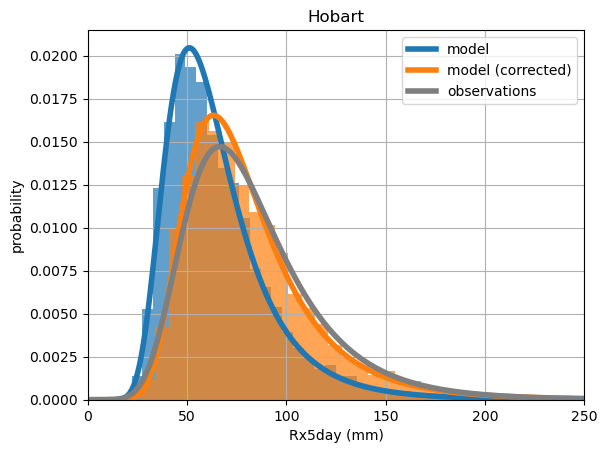

In [101]:
model_da_indep.plot.hist(bins=50, density=True, alpha=0.7, facecolor='tab:blue')
model_raw_shape, model_raw_loc, model_raw_scale = eva.fit_gev(model_da_indep_stacked.values, generate_estimates=True)
model_raw_pdf = gev.pdf(xvals, model_raw_shape, model_raw_loc, model_raw_scale)
plt.plot(xvals, model_raw_pdf, color='tab:blue', linewidth=4.0, label='model')

model_da_bc.plot.hist(bins=50, density=True, alpha=0.7, facecolor='tab:orange')
model_bc_shape, model_bc_loc, model_bc_scale = eva.fit_gev(model_da_bc_stacked.values, generate_estimates=True)
model_bc_pdf = gev.pdf(xvals, model_bc_shape, model_bc_loc, model_bc_scale)
plt.plot(xvals, model_bc_pdf, color='tab:orange', linewidth=4.0, label='model (corrected)')

agcd_ds['pr'].plot.hist(ax=ax, bins=50, density=True, facecolor='tab:gray', alpha=0.7)
plt.plot(xvals, agcd_pdf, color='tab:gray', linewidth=4.0, label='observations')

plt.xlabel('Rx5day (mm)')
plt.ylabel('probability')
plt.title('Hobart')
plt.xlim(0, 250)
plt.legend()
plt.grid()
plt.savefig(
    'distribution.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)
plt.show()

INFO:root:mean: Obs = 83.49502563476562, Model 95% CI =61.22568426132202 to 70.27519493103027
INFO:root:standard deviation: Obs = 34.267822265625, Model 95% CI =21.563333606719972 to 32.07686376571655
INFO:root:skew: Obs = 1.4069650511166405, Model 95% CI =0.6556979433032684 to 2.672667278136661
INFO:root:kurtosis: Obs = 3.4493238193282894, Model 95% CI =-0.08692188996212717 to 12.516459738190443
INFO:root:GEV shape: Obs = -0.05232628138994108, Model 95% CI =-0.2566958263071768 to 0.039586187179874874
INFO:root:GEV location: Obs = 67.7079983493445, Model 95% CI =49.488639226303405 to 57.204930442272904
INFO:root:GEV scale: Obs = 25.03453176147036, Model 95% CI =15.299354344409528 to 20.69304168194282
INFO:root:mean: Obs = 83.49502563476562, Bias corrected model 95% CI =75.20586357116699 to 87.00877513885497
INFO:root:standard deviation: Obs = 34.267822265625, Bias corrected model 95% CI =26.5865065574646 to 40.5317156791687
INFO:root:skew: Obs = 1.4069650511166405, Bias corrected model

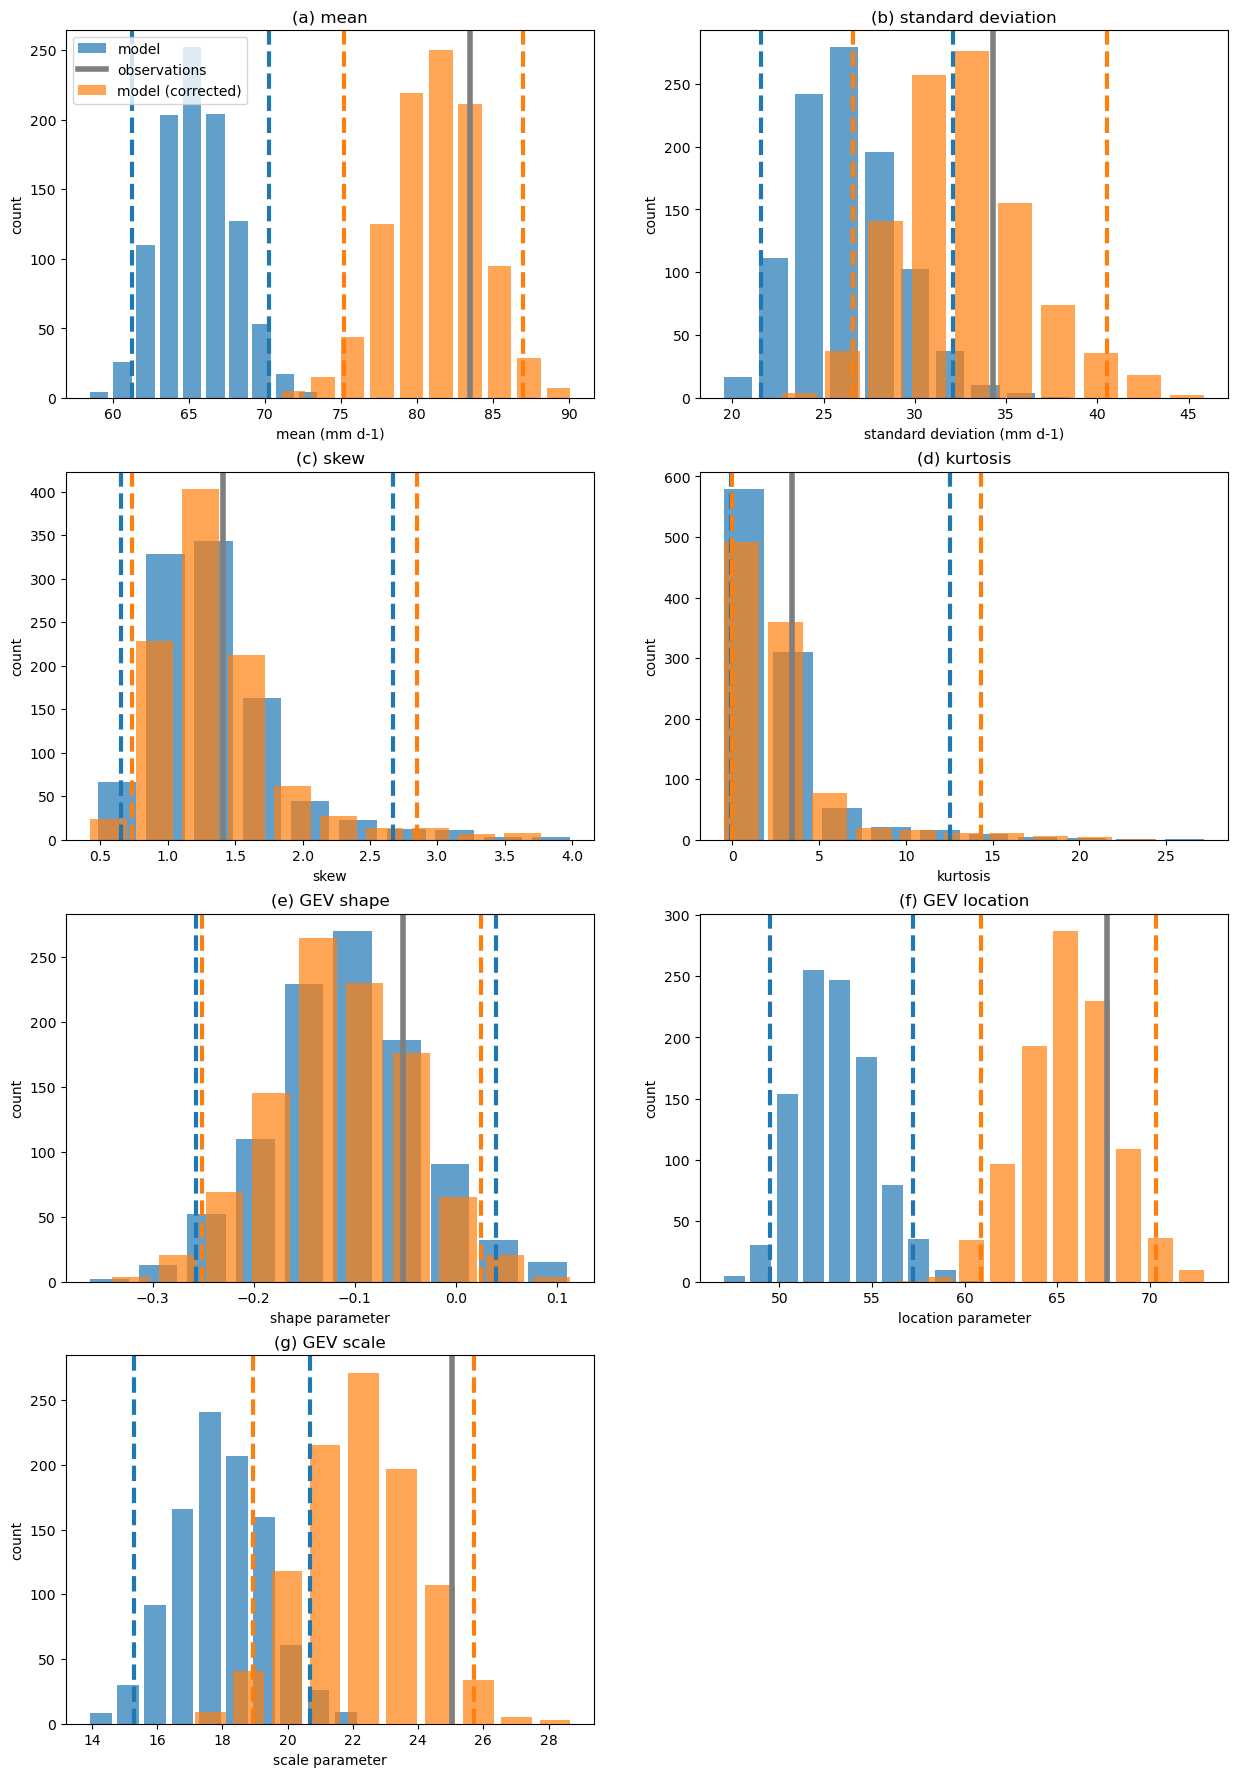

In [36]:
moments.create_plot(
    model_da_indep,
    agcd_ds['pr'],
    da_bc_fcst=model_da_bc,
    outfile='moments.png',
)

In [45]:
similarity_ds = similarity.similarity_tests(model_da_indep, agcd_ds['pr'], 'pr')

In [46]:
print('KS score:', similarity_ds['ks_statistic'].values)
print('KS p-value:', similarity_ds['ks_pval'].values)
print('AD score:', similarity_ds['ad_statistic'].values)
print('AD p-value:', similarity_ds['ad_pval'].values)

KS score: 0.2797175
KS p-value: 7.914835e-09
AD score: 29.255798
AD p-value: 0.001


/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xstatstests/scipy.py:246: UserWarning: p-value floored: true value smaller than 0.001
  outputs = func(args, **scipy_kwargs)


In [47]:
similarity_bc_ds = similarity.similarity_tests(model_da_bc, agcd_ds['pr'], 'pr')

In [48]:
print('KS score:', similarity_bc_ds['ks_statistic'].values)
print('KS p-value:', similarity_bc_ds['ks_pval'].values)
print('AD score:', similarity_bc_ds['ad_statistic'].values)
print('AD p-value:', similarity_bc_ds['ad_pval'].values)

KS score: 0.07429516
KS p-value: 0.49535686
AD score: -0.15807883
AD p-value: 0.25


/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xstatstests/scipy.py:246: UserWarning: p-value capped: true value larger than 0.25
  outputs = func(args, **scipy_kwargs)


## Process assessment

In [49]:
model_da_indep_stacked_df = model_da_indep_stacked.to_dataframe()

In [109]:
print(model_da_indep_stacked_df)

                                        event_time                 time  \
ensemble init_date           lead_time                                    
0        1960-11-01 00:00:00 1          1961-02-04  1961-11-01 12:00:00   
                             2          1962-01-10  1962-11-01 12:00:00   
                             3          1963-01-22  1963-11-01 12:00:00   
                             4          1964-02-27  1964-11-01 12:00:00   
                             5          1965-12-24  1965-11-01 12:00:00   
...                                            ...                  ...   
9        2018-11-01 00:00:00 6          2024-05-05  2024-11-01 12:00:00   
                             7          2025-11-13  2025-11-01 12:00:00   
                             8          2026-08-20  2026-11-01 12:00:00   
                             9          2027-04-16  2027-11-01 12:00:00   
                             10         2028-08-14  2028-11-01 12:00:00   

                        

In [72]:
model_da_indep_stacked_df.sort_values(by=['pr'], ascending=False)

event_time                 time  \
ensemble init_date           lead_time                                    
2        1974-11-01 00:00:00 4          1978-01-29  1978-11-01 12:00:00   
         1987-11-01 00:00:00 7          1994-01-01  1994-11-01 12:00:00   
                             6          1993-12-26  1993-11-01 12:00:00   
0        1965-11-01 00:00:00 7          1972-01-09  1972-11-01 12:00:00   
9        2011-11-01 00:00:00 3          2014-04-23  2014-11-01 12:00:00   
...                                            ...                  ...   
4        2008-11-01 00:00:00 10         2018-12-08  2018-11-01 12:00:00   
         1961-11-01 00:00:00 5          1966-12-10  1966-11-01 12:00:00   
2        2015-11-01 00:00:00 8          2023-07-06  2023-11-01 12:00:00   
9        1973-11-01 00:00:00 5          1978-01-22  1978-11-01 12:00:00   
7        2002-11-01 00:00:00 7          2009-11-03  2009-11-01 12:00:00   

                                        ensemble            init_date  \
ensemble init_date           lead_time                                  
2        1974-11-01 00:00:00 4                 2  1974-11-01 00:00:00   
         1987-11-01 00:00:00 7                 2  1987-11-01 00:00:00   
                             6                 2  1987-11-01 00:00:00   
0        1965-11-01 00:00:00 7                 0  1965-11-01 00:00:00   
9        2011-11-01 00:00:00 3                 9  2011-11-01 00:00:00   
...                                          ...                  ...   
4        2008-11-01 00:00:00 10                4  2008-11-01 00:00:00   
         1961-11-01 00:00:00 5                 4  1961-11-01 00:00:00   
2        2015-11-01 00:00:00 8                 2  2015-11-01 00:00:00   
9        1973-11-01 00:00:00 5                 9  1973-11-01 00:00:00   
7        2002-11-01 00:00:00 7                 7  2002-11-01 00:00:00   

                                        lead_time          pr  
ensemble init_date           lead_time                         
2        1974-11-01 00:00:00 4                  4  292.911774  
         1987-11-01 00:00:00 7                  7  254.662506  
                             6                  6  251.780121  
0        1965-11-01 00:00:00 7                  7  212.910568  
9        2011-11-01 00:00:00 3                  3  207.320740  
...                                           ...         ...  
4        2008-11-01 00:00:00 10                10   23.359249  
         1961-11-01 00:00:00 5                  5   23.211643  
2        2015-11-01 00:00:00 8                  8   23.010380  
9        1973-11-01 00:00:00 5                  5   22.199301  
7        2002-11-01 00:00:00 7                  7   22.033587  

[5900 rows x 6 columns]

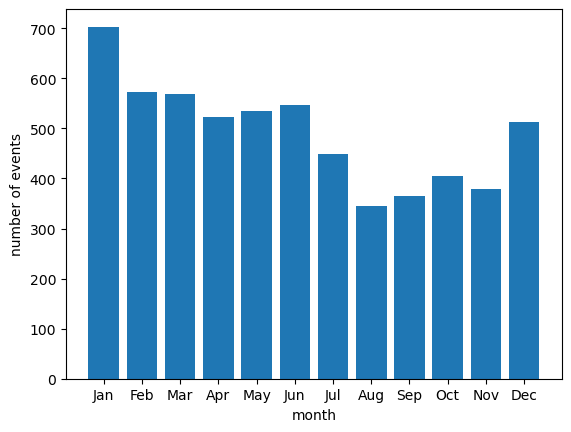

In [108]:
process_utils.plot_event_seasonality(model_da_indep_stacked_df, outfile='seasonality.png')

In [106]:
reload(process_utils)

<module 'unseen.process_utils' from '/home/599/dbi599/unseen/unseen/process_utils.py'>

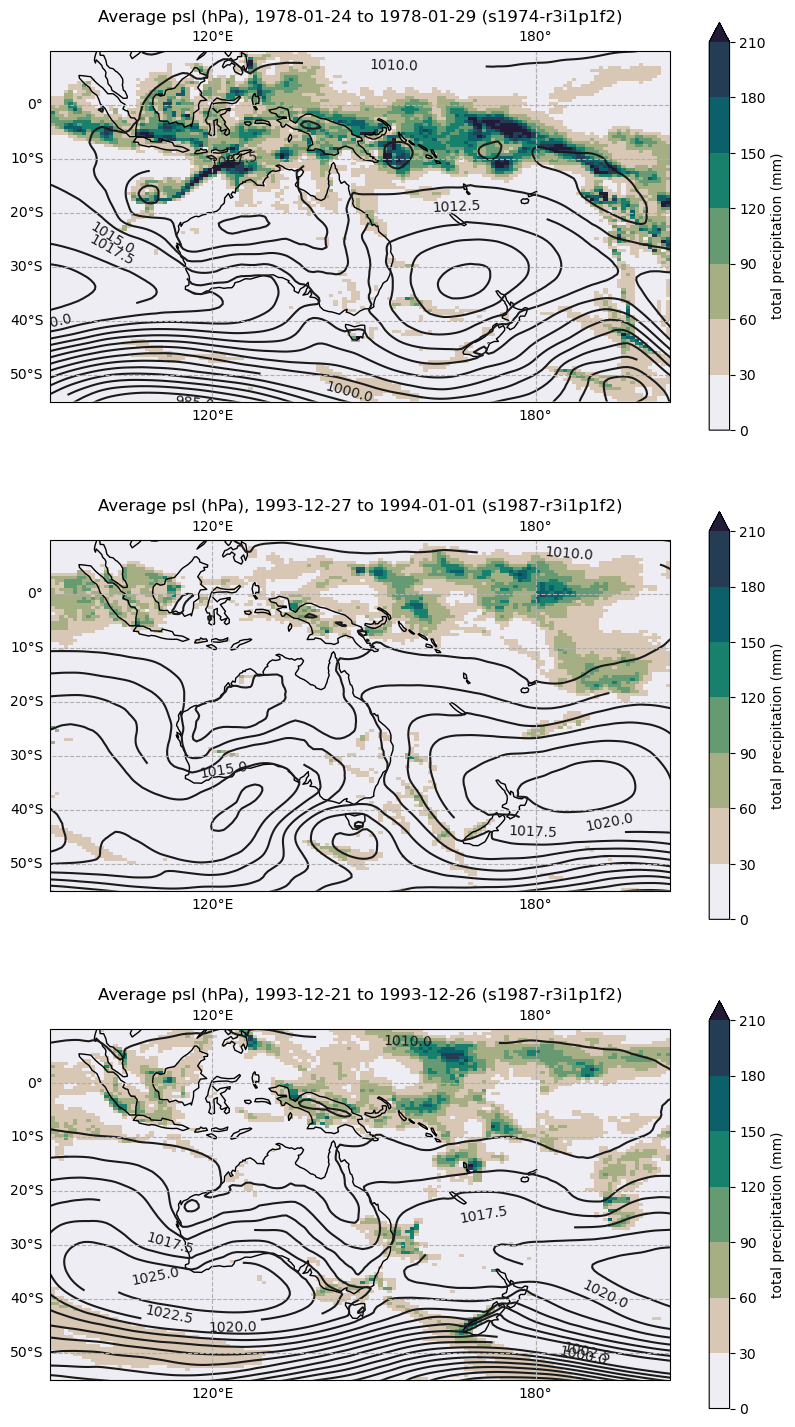

In [107]:
process_utils.plot_circulation(
    model_da_indep_stacked_df,
    event_var='pr',
    top_n_events=3,
    event_duration=5,
    infile_list='/home/599/dbi599/unseen/file_lists/HadGEM3-GC31-MM_dcppA-hindcast_pr_files.txt',
    color_var='pr',
    contour_var='psl',
    color_levels=[0, 30, 60, 90, 120, 150, 180, 210],
    init_year_offset=0,
    outfile='meteorology.png'
)

## Results

In [99]:
print(model_da_bc_stacked)

<xarray.DataArray 'pr' (sample: 5900)>
array([124.84209 ,  73.138466,  62.510113, ...,  57.245464, 121.23235 ,
        34.655647], dtype=float32)
Coordinates:
    event_time  (sample) <U28 '1961-02-04' '1962-01-10' ... '2028-08-14'
    time        (sample) object 1961-11-01 12:00:00 ... 2028-11-01 12:00:00
  * sample      (sample) object MultiIndex
  * ensemble    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 9 9 9 9 9 9 9 9 9 9 9
  * init_date   (sample) object 1960-11-01 00:00:00 ... 2018-11-01 00:00:00
  * lead_time   (sample) int64 1 2 3 4 5 6 7 8 9 10 1 ... 1 2 3 4 5 6 7 8 9 10
Attributes:
    standard_name:           lwe_precipitation_rate
    units:                   mm d-1
    bias_correction_method:  multiplicative
    bias_correction_period:  1970-01-01-2018-12-30


KeyboardInterrupt: 

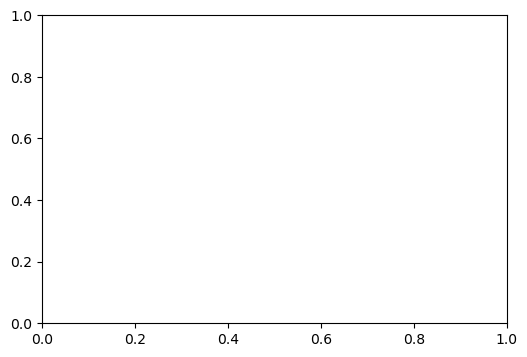

In [103]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()
eva.plot_gev_return_curve(
    ax,
    model_da_bc_stacked.values,
    rx5day_max,
    n_bootstraps=1000,
    direction="exceedance",
    ylabel='Rx5day (mm)',
    ylim=(0, 400),
)
plt.savefig(
    'return_curve.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=200
)